### Dropouts Practical in Neural Network

#### 1. The Forward Pass (During Training)

1.  **Random Masking:** For each layer where Dropout is applied, a random fraction (e.g., 20%, 50%) of neurons is temporarily "turned off" or "dropped." This is done by multiplying the layer's output by a **binary mask** (a vector of 1s and 0s).
    *   Example: If a layer has 4 neurons with outputs `[0.5, 1.2, 0.8, 2.0]` and a 50% dropout rate, the mask might be `[1, 0, 0, 1]`.
2.  **Scaling:** The outputs of the *remaining* neurons are scaled up by `1 / (1 - dropout_rate)`. If the dropout rate is 0.5 (50%), they are scaled by `1 / 0.5 = 2`.
    *   Result from our example: The output becomes `[0.5*2, 1.2*0, 0.8*0, 2.0*2] = [1.0, 0, 0, 4.0]`.

**Why scale?** It ensures that the *expected value* (the average) of the neuron's output remains the same during training as it will be during testing, preventing a shift in the overall network's activation scale.

#### 2. The Backward Pass (The Key to Your Question)

This is the crucial part. Backpropagation calculates the gradient of the loss with respect to (w.r.t.) every weight.

*   **The dropped neurons had an output of ZERO in the forward pass.**
*   Therefore, during the backward pass:
    *   The **gradient flowing back** to a dropped neuron will also be **ZERO**.
    *   If the gradient for a weight is zero, then the **weight update (e.g., `weight = weight - learning_rate * gradient`) is also ZERO.**

**In simple terms:** If a neuron is dropped, it's as if it doesn't exist for that single training step. It doesn't contribute to the final output, so it receives no feedback on how to improve. Its weights remain frozen for that step.

In [ ]:
# Forming the dummy dataset
import numpy as np

X_train = np.linspace(-1, 1, 20).reshape(-1, 1)
y_train = np.array([
    -0.6561 , -0.3099 , -0.59035, -0.50855, -0.285,
    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485
])

X_test = np.linspace(-1, 1, 20).reshape(-1, 1)
y_test = np.array([
    -0.69415, -0.451  , -0.43005, -0.4484 , -0.1475,
    -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286,
    0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719,
    0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435
])

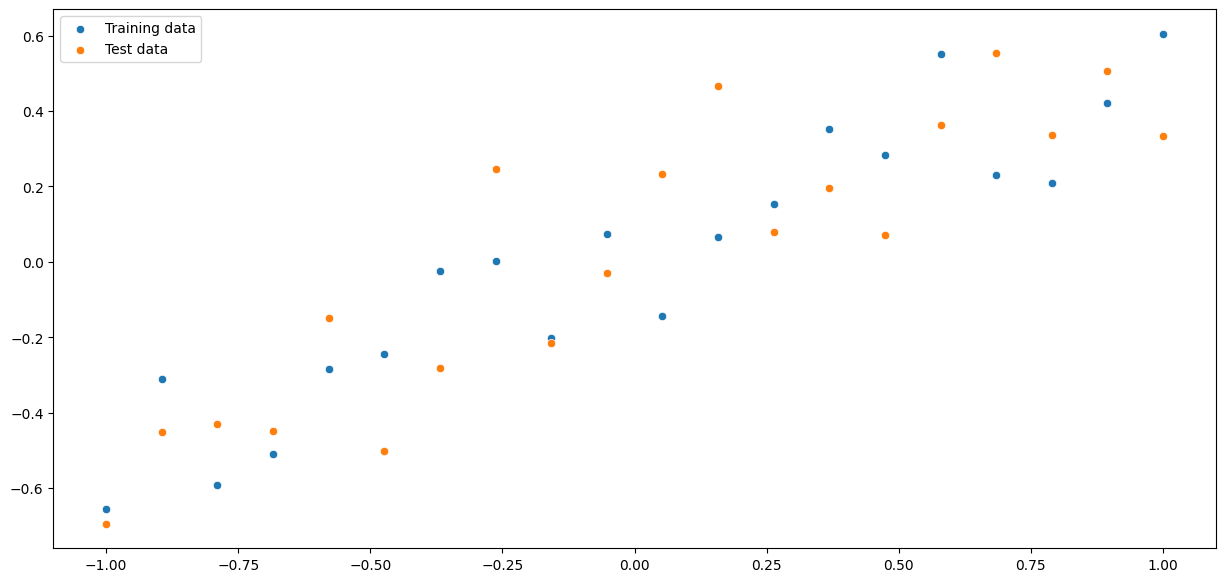

In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 7))
sns.scatterplot(x = X_train.ravel(), y = y_train, label = "Training data")
sns.scatterplot(x = X_test.ravel(), y = y_test, label = "Test data")
plt.legend()
plt.show()

In [ ]:
# Building the model architecture
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense, Dropout

model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

> ### Traning `without Dropout`

In [ ]:
# Training the model
opt = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = opt, loss = 'mse')
history = model.fit(X_train, y_train, epochs = 500, verbose = 0, validation_data = (X_test, y_test))

The hyperparameter `dropout rate` typically set between 10% and 50%

- For `recurrent neural networks (RNNs)`, the recommended dropout rate typically falls between `20% to 30%`. This lower range helps preserve the temporal dependencies that are crucial for RNN performance.

- For `convolutional neural networks (CNNs)`, higher dropout rates between `40% to 50%` are commonly used. CNNs can tolerate more aggressive dropout due to their inherent spatial redundancy and feature hierarchy.

> ### DROPOUT LAYER WITH - `dropping_rate = 0.25`

In [8]:
drop_model_1 = Sequential()

drop_model_1.add(Input(shape = (X_train.shape[1],)))
drop_model_1.add(Dropout(rate=0.25))

drop_model_1.add(Dense(units = 128, activation = 'relu'))
drop_model_1.add(Dropout(rate=0.25))

drop_model_1.add(Dense(units = 128, activation = 'relu'))
drop_model_1.add(Dropout(rate=0.25))

drop_model_1.add(Dense(units = 1, activation = 'linear'))

drop_model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
opt = keras.optimizers.Adam(learning_rate = 0.01)
drop_model_1.compile(optimizer = opt, loss = 'mse')

In [10]:
history_drop_1 = drop_model_1.fit(X_train, y_train, epochs = 500, verbose = 0, validation_data = (X_test, y_test))

> ### DROPOUT LAYER WITH - `dropping_rate = 0.5`

In [11]:
drop_model_2 = Sequential()

drop_model_2.add(Input(shape = (X_train.shape[1],)))
drop_model_2.add(Dropout(rate=0.5))

drop_model_2.add(Dense(units = 200, activation = 'relu'))
drop_model_2.add(Dropout(rate=0.5))

drop_model_2.add(Dense(units = 200, activation = 'relu'))
drop_model_2.add(Dropout(rate=0.5))

drop_model_2.add(Dense(units = 1, activation = 'linear'))

drop_model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_3 (Dropout)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,801 (159.38 KB)

 Trainable params: 40,801 (159.38 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
opt = keras.optimizers.Adam(learning_rate = 0.01)
drop_model_2.compile(optimizer = opt, loss = 'mse')

In [13]:
history_drop_2 = drop_model_2.fit(X_train, y_train, epochs = 500, verbose = 0, validation_data = (X_test, y_test))

> `Book`: Since each neuron can be either present or absent, there are a total of 2^N possible networks (where N is the total number of droppable neurons). This is such a huge number that it is virtually impossible for the same neural network to be sampled twice. Once you have run 10,000 training steps, you have essentially trained 10,000 (If 2^N >= 10000) different neural networks, each with just one training instance. These neural networks are obviously not independent because they share many of their weights, but they are nevertheless all different. The resulting neural network can be seen as an averaging ensemble of all these smaller neural networks.

> ### `BEST FIT LINE` FOR ALL MODELS

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


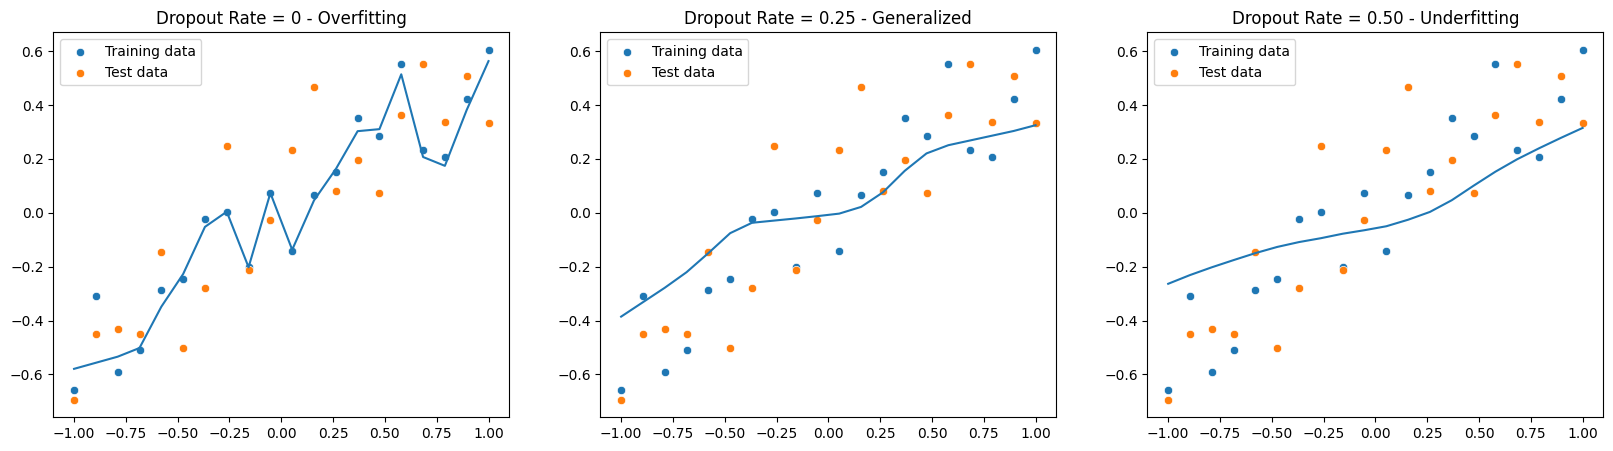

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

# For Dense Model
y_pred = model.predict(X_train.reshape(-1, 1))

sns.scatterplot(x = X_train.ravel(), y = y_train, label = "Training data", ax = ax[0])
sns.scatterplot(x = X_test.ravel(), y = y_test, label = "Test data", ax = ax[0])
ax[0].plot(X_train, y_pred)
ax[0].set_title('Dropout Rate = 0 - Overfitting')
ax[0].legend()

# For Dropout Layer Model - 1
y_pred_drop_1 = drop_model_1.predict(X_train)

sns.scatterplot(x = X_train.ravel(), y = y_train, label = "Training data", ax = ax[1])
sns.scatterplot(x = X_test.ravel(), y = y_test, label = "Test data", ax = ax[1])
ax[1].plot(X_train.ravel(), y_pred_drop_1)
ax[1].set_title('Dropout Rate = 0.25 - Generalized')
ax[1].legend()

# For Dropout Layer Model - 2
y_pred_drop_2 = drop_model_2.predict(X_train)

sns.scatterplot(x = X_train.ravel(), y = y_train, label = "Training data", ax = ax[2])
sns.scatterplot(x = X_test.ravel(), y = y_test, label = "Test data", ax = ax[2])
ax[2].plot(X_train.ravel(), y_pred_drop_2)
ax[2].set_title('Dropout Rate = 0.50 - Underfitting')
ax[2].legend()

fig.show()

> Increasing the dropout rate strengthens the model’s resistance to overfitting, but at the cost of longer training times and potentially decreased accuracy in the early stages.
<hr>

> ### DROPOUT LAYERS FOR CLASSIFICATION

In [15]:
from sklearn.datasets import make_classification

In [16]:
X, y = make_classification(
    n_samples = 500,
    n_features = 2,
    n_informative = 1,
    n_redundant = 0,
    n_classes = 2,
    n_clusters_per_class=1,
    class_sep = 1,
    random_state = 1
)

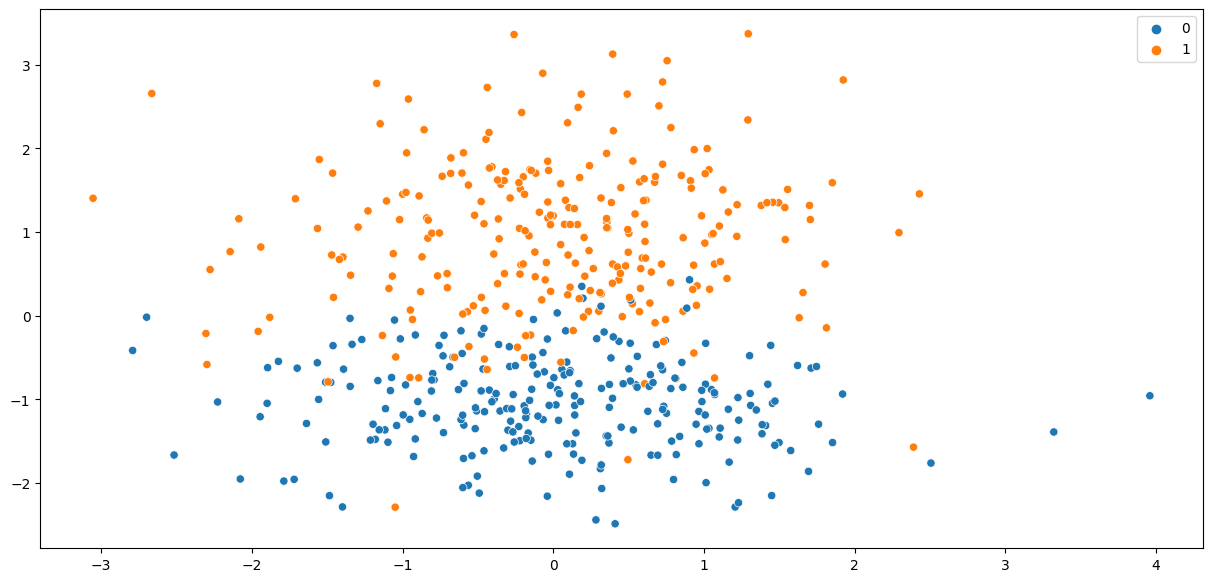

In [17]:
plt.figure(figsize = (15, 7))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
model = Sequential()

model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
opt = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, epochs = 500, verbose = 0, validation_data = (X_test, y_test))

> ### DROPOUT LAYER WITH - `dropping_rate = 0.5`

In [22]:
drop_model_1 = Sequential()

drop_model_1.add(Input(shape = (X_train.shape[1],)))
drop_model_1.add(Dropout(rate=0.55))

drop_model_1.add(Dense(units = 128, activation = 'relu'))
drop_model_1.add(Dropout(rate=0.55))

drop_model_1.add(Dense(units = 128, activation = 'relu'))
drop_model_1.add(Dropout(rate=0.55))

drop_model_1.add(Dense(units = 1, activation = 'sigmoid'))

drop_model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
opt = keras.optimizers.Adam(learning_rate = 0.01)
drop_model_1.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])

In [24]:
history_drop_1 = drop_model_1.fit(X_train, y_train, epochs = 500, verbose = 0, validation_data = (X_test, y_test))

> ### DECISION REGIONS FOR ALL MODELS

37500/37500 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step
37500/37500 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step


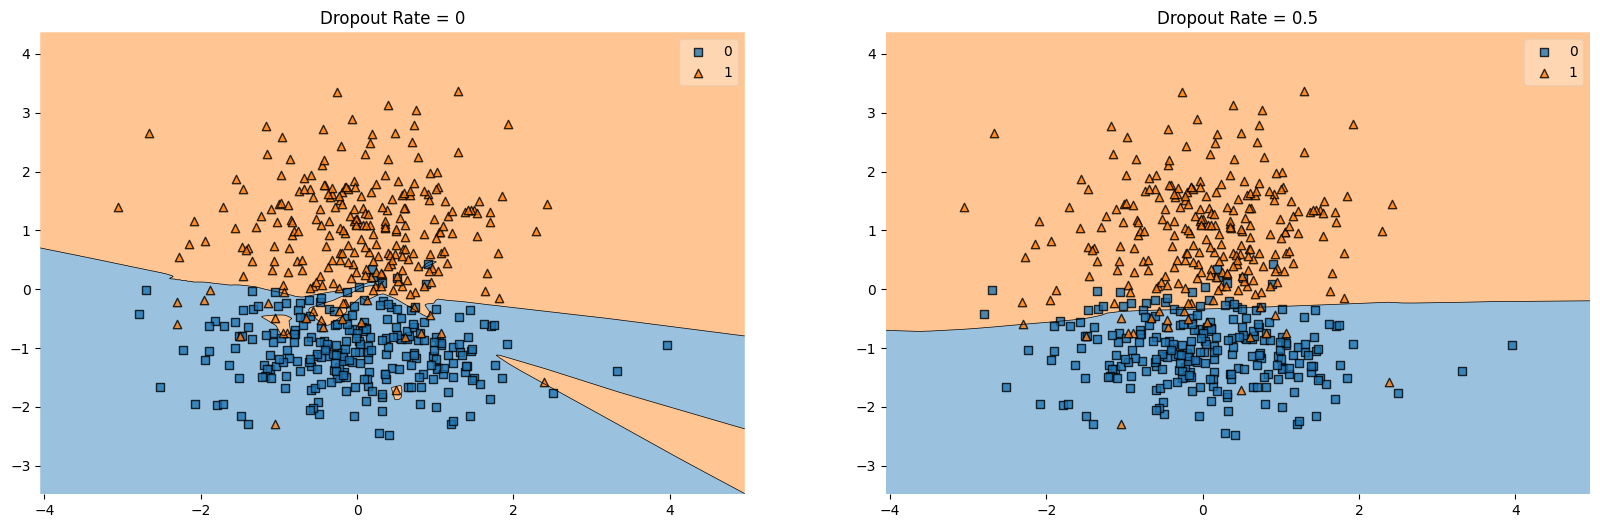

In [25]:
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
plot_decision_regions(
    X, y, model, ax = ax[0]
)
ax[0].set_title('Dropout Rate = 0')
plot_decision_regions(
    X, y, drop_model_1 , ax = ax[1]
)
ax[1].set_title('Dropout Rate = 0.5')
fig.show()

> increasing the dropout rate strengthens the model’s resistance to overfitting, but at the cost of longer training times and potentially decreased accuracy in the early stages.
<hr>

> `Note`: During training with dropout (p=75%), only 25% of neurons are active. To keep things balanced between training and testing, we multiply weights by 4 during training (or more generally, divide by the keep rate 1-p). This ensures the network behaves consistently.<br><br>
> `Note`: Since dropout is only active during training, comparing the train ing loss and the validation loss can be misleading. In particular, a model may be overfitting the training set and yet have similar training and validation losses. So, make sure to evaluate the train ing loss without dropout (e.g., after training).<br><br>
> `Note`: If you want to regularize a self-normalizing network based on the SELU activation function (as discussed earlier), you should use alpha dropout: this is a variant of dropout that preserves the mean and standard deviation of its inputs. It was introduced in the same paper as SELU, as regular dropout would break self-normalization.
